# REGRESIÓN LINEAL MÚLTIPLE

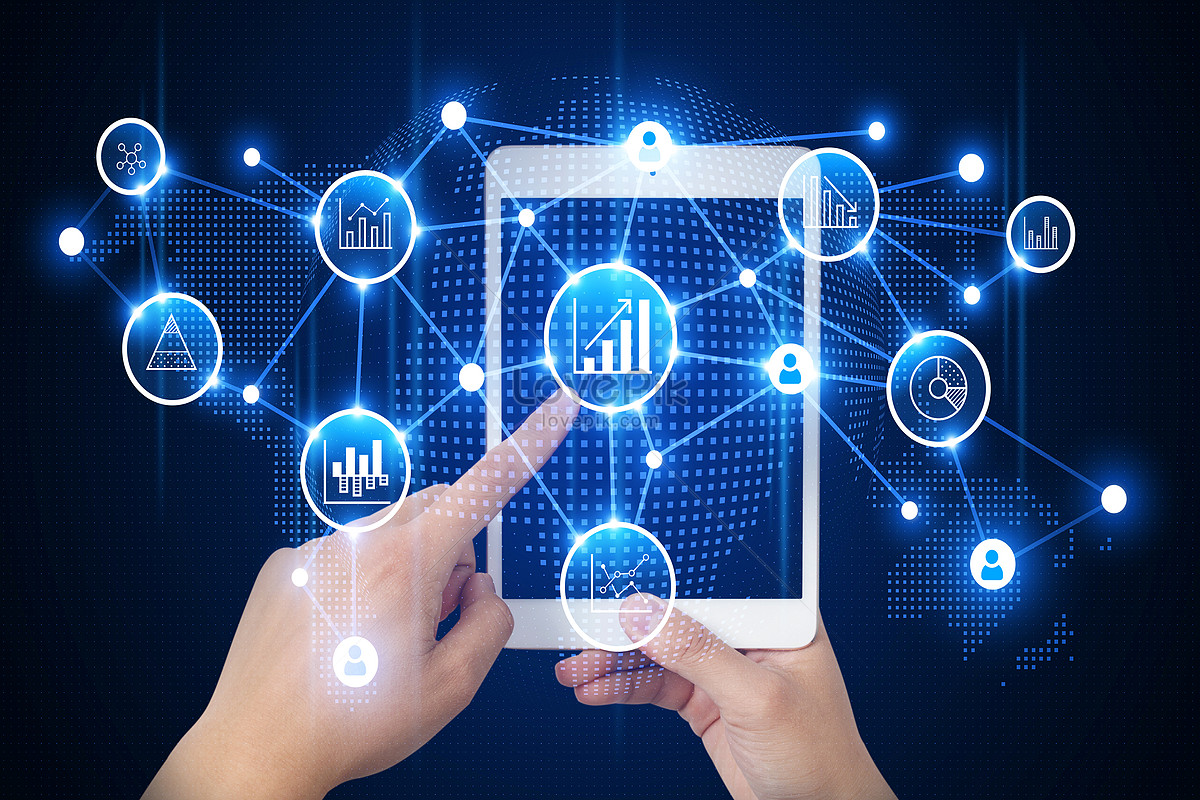

**CONTENIDO**    
1.Tips regresión lineal múltiple.    
2.Importación del dataset.       
3.Información general del dataset.      
4.Modelo de regresión lineal.    
5.Evaluación del modelo.     
6.Fuente del dataset. 

**TIPS REGRESIÓN LINEAL MÚLTIPLE**

Se manejan varibles independientes que contribuyen a la variable dependiente
El análisis de la relación entr la variable a explicar y las explicativas lo llamamos análisis de regresión.

y=a1x1+a2x2+anxn+b

Es conveniente seleccionar las mejores variables independientes que puedan
contribuir a la dependiente. Para ello podemos contruir una matriz de correlación para 
todas las variables independientese incluyendo la dependiente, a fin de analizar 
la correlación.

Agregar más variables independientes no asegura que la regresión sea mejor. 
Las independientes que seleccionemos será optimo que correlacionen con la dependiente, pero no entre sí.

**IMPORTACIÓN DEL DATASET**

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns  # seaborn para plotear 

#Regresión lineal
# ==============================================================================
from sklearn import linear_model
from sklearn.model_selection import train_test_split #crear datos train y test

#Evaluación del modelo
# ==============================================================================
import sklearn.metrics as sm

In [2]:
#DATASET
dataset = pd.read_csv('StudentsPerformance.csv', encoding = "ISO-8859-1", delimiter=',')  

#Exploramos el dataset
dataset.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [3]:
dataset['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [4]:
dataset['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [5]:
#agregaremos una columna asignando un valor entero según el tipo de educación de padres, de mayor a menor formación
condiciones=[
	(dataset['parental level of education']=="master's degree"),
	(dataset['parental level of education']=="bachelor's degree"),
	(dataset['parental level of education']=="associate's degree"),
	(dataset['parental level of education']=="some college"),
	(dataset['parental level of education']=="high school"),
	(dataset['parental level of education']=="some high school")
]
valores=[6,5,4,3,2,1]
dataset['parental education int']=np.select(condiciones, valores)
dataset['parental education int'].value_counts()

3    226
4    222
2    196
1    179
5    118
6     59
Name: parental education int, dtype: int64

In [6]:
#agregaremos una columna asignando un valor entero según el tipo de educación de padres, de mayor a menor formación
condiciones2=[
	(dataset['lunch']=="free/reduced"),
	(dataset['lunch']=="standard")
]
valores2=[0,1]
dataset['lunch int']=np.select(condiciones2, valores2)
dataset['lunch int'].value_counts()

1    645
0    355
Name: lunch int, dtype: int64

In [7]:
#agregaremos una columna asignando un valor entero según el tipo de educación de padres, de mayor a menor formación
condiciones3=[
	(dataset['test preparation course']=="none"),
	(dataset['test preparation course']=="completed")
]
valores3=[0,1]
dataset['test preparation course int']=np.select(condiciones3, valores3)
dataset['test preparation course int'].value_counts()

0    642
1    358
Name: test preparation course int, dtype: int64

**INFORMACIÓN DEL DATASET**

In [8]:
dataset.shape

(1000, 11)

In [9]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental education int,lunch int,test preparation course int
0,female,group B,bachelor's degree,standard,none,72,72,74,5,1,0
1,female,group C,some college,standard,completed,69,90,88,3,1,1
2,female,group B,master's degree,standard,none,90,95,93,6,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,4,0,0
4,male,group C,some college,standard,none,76,78,75,3,1,0


In [10]:
dataset.describe()

,math score,reading score,writing score,parental education int,lunch int,test preparation course int
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,3.081000,0.645000,0.358000
std,15.16308,14.600192,15.195657,1.460333,0.478753,0.479652
min,0.00000,17.000000,10.000000,1.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,2.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,3.000000,1.000000,0.000000
75%,77.00000,79.000000,79.000000,4.000000,1.000000,1.000000
max,100.00000,100.000000,100.000000,6.000000,1.000000,1.000000


In [11]:
#Observamos que aperturando por lunch, hay una diferencia de más de 10 puntos en el promedio de nota de matemática y + de 7 en
#lectura/escritura comparando a los que lunch estandar vs free

dataset[["lunch", "math score", "writing score","reading score"]].groupby(["lunch"]).mean()

,math score,writing score,reading score
lunch,,,
free/reduced,58.921127,63.022535,64.653521
standard,70.034109,70.823256,71.654264


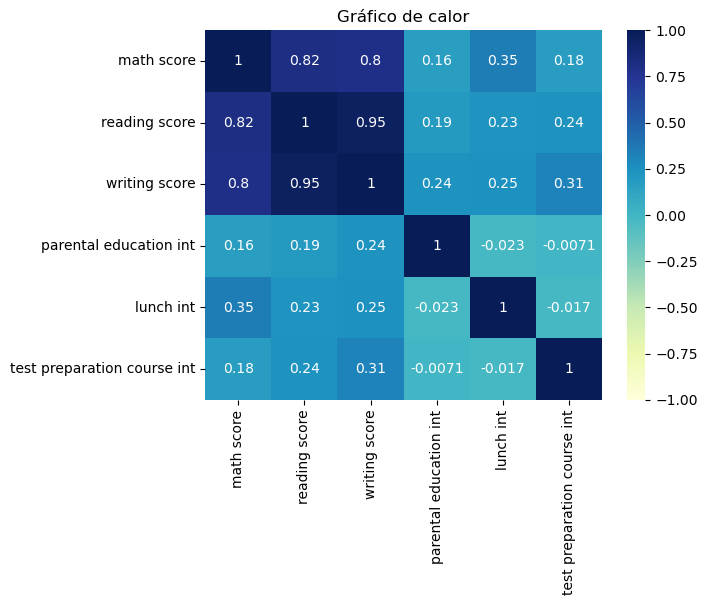

In [12]:
#graficaremos la matriz de correlación 
corr=dataset.corr()

sns.heatmap(corr,annot=True,cmap='YlGnBu',vmax=1,vmin=-1)
plt.title('Gráfico de calor')
plt.show()


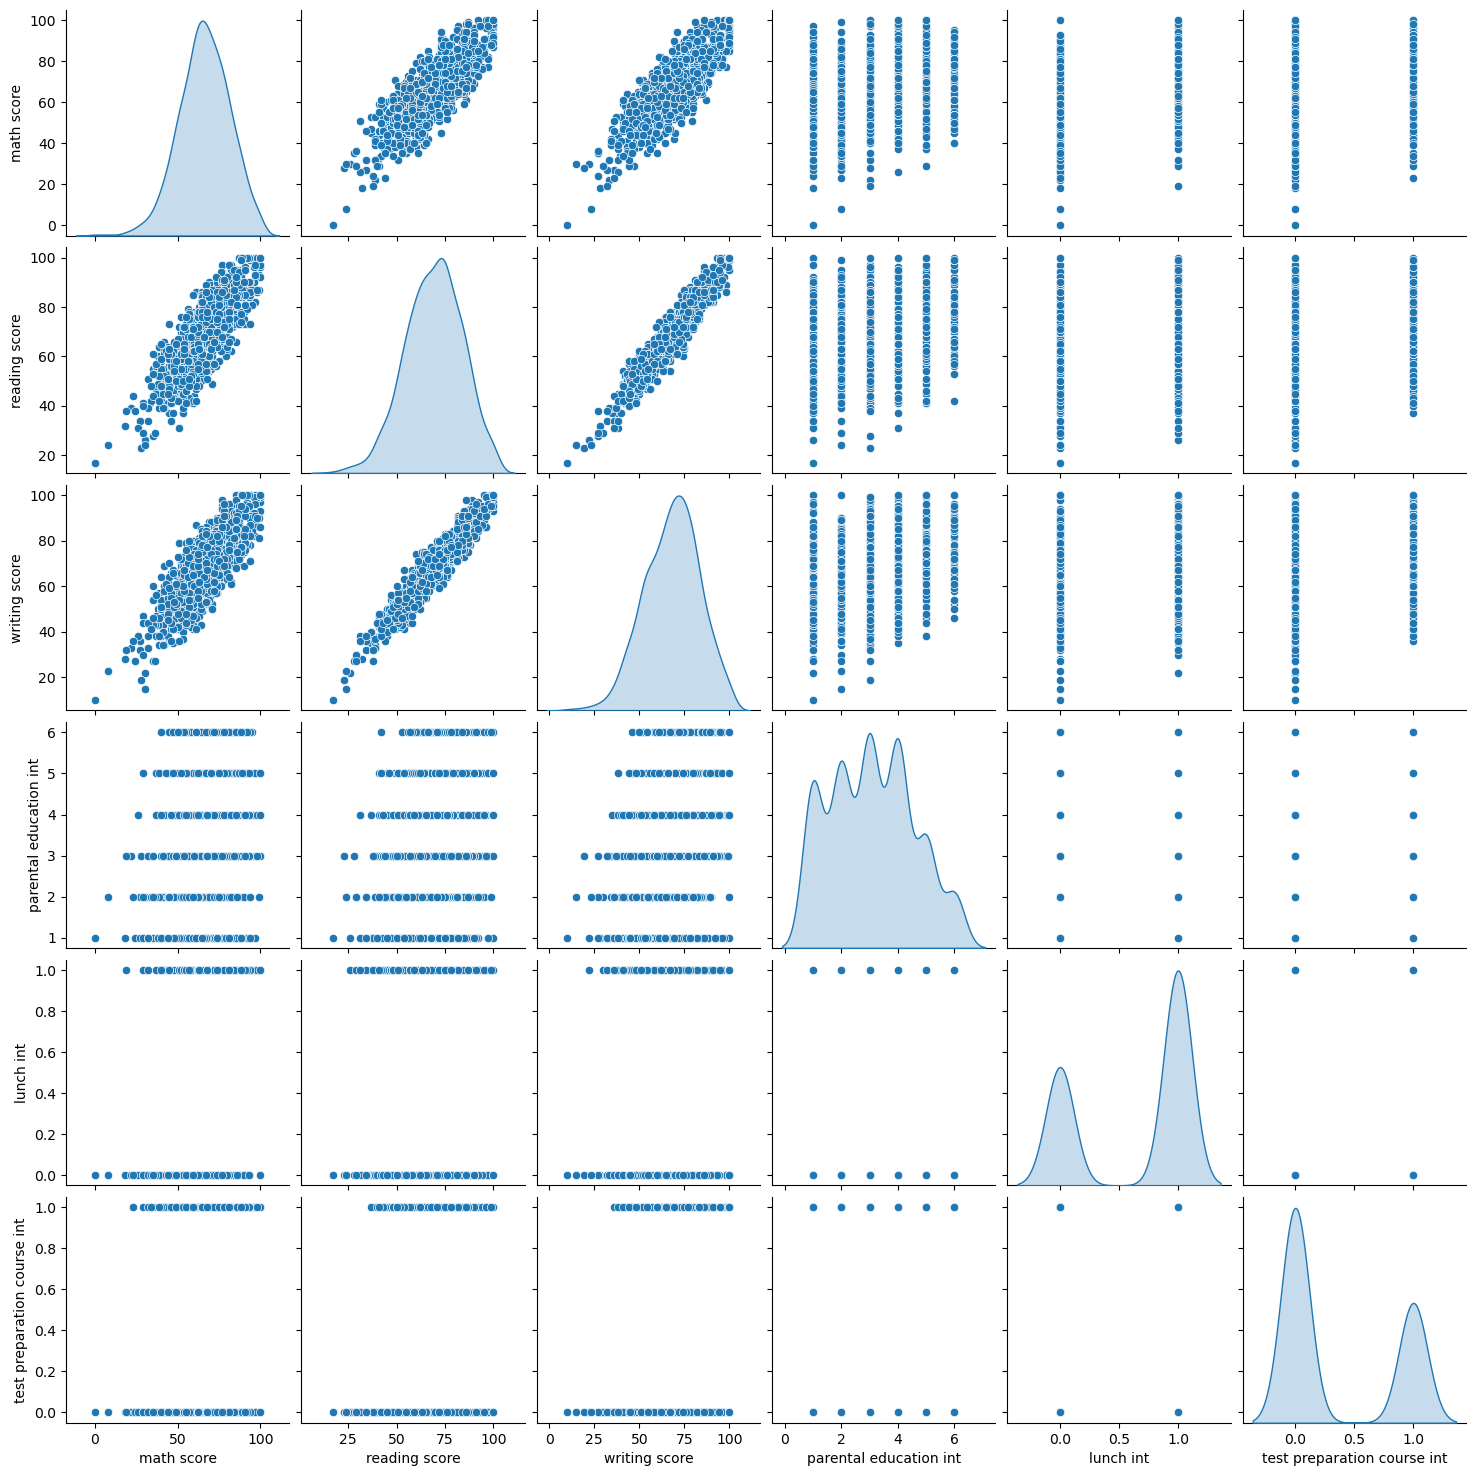

In [13]:
#graficamos todo con pairplot
sns.pairplot(dataset,diag_kind='kde',)
plt.show()

In [28]:
X=dataset[['writing score','math score']]
y=dataset[['reading score']]
y.shape

(1000, 1)

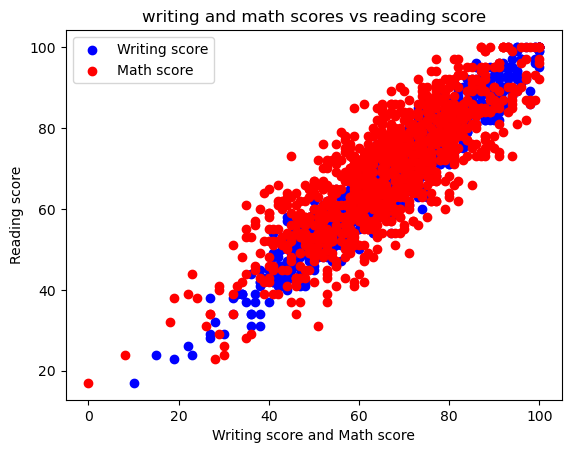

In [29]:
# Crear el gráfico de dispersión
plt.scatter(X['writing score'], y, color='blue', label='Writing score')
plt.scatter(X['math score'], y, color='red', label='Math score')

# Agregar etiquetas de los ejes y título del gráfico
plt.xlabel('Writing score and Math score')
plt.ylabel('Reading score')
plt.title('writing and math scores vs reading score')

#plt.xlim(0,1.2) #limite para el eje x.
#plt.ylim(0,1.5) #limite para el eje y.

plt.legend() #le indico donde poner la leyenda (horizontal, vertical)
#plt.grid() #adicionar una grilla
plt.show()

**MODELO DE REGRESIÓN LINEAL**

Intentaremos predecir la nota de lectura a partir de la nota de escritura y matemática.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, shuffle=True)

In [33]:
X_train.shape

(800, 2)

In [34]:
# Creamos un objeto de regresión lineal
linear_regressor = linear_model.LinearRegression()

# Ajustamos la regresión a los datos de entrenamiento
linear_regressor.fit(X_train, y_train)

# Y a partir de datos de regresión encontrados
y_pred_test = linear_regressor.predict(X_test)


**EVALUACIÓN DEL MODELO**

In [38]:
"""Existen varias formas de evaluar una regresión lineal, y podemos utilizar nuevamente scikit-learn  para 
realizar esta tarea, mediante el módulo metrics según se muestra a continuación:"""   

#Error absoluto medio:__ este es el promedio de errores absolutos de todos los puntos de datos 
#en el conjunto de datos dado.
print("Error absoluto medio =", round(sm.mean_absolute_error(y_test, y_pred_test), 2))

#Error cuadrático medio:__ Este es el promedio de los cuadrados de los errores de todos los puntos de datos
#en el conjunto de datos dado. ¡Es una de las métricas más populares que hay!
print("Error cuadratico medio =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 

#Error absoluto mediano:__ Esta es la mediana de todos los errores en el conjunto de datos dado. La principal 
#ventaja de esta métrica es que es robusta a los valores atípicos. Un único punto negativo en el conjunto de datos 
#de prueba no distorsionaría la métrica de error completa, en lugar de una métrica de error promedio.
print("Error absoluto mediano =", round(sm.median_absolute_error(y_test, y_pred_test), 2))

#Puntuación de varianza explicada:__ esta puntuación mide qué tan bien nuestro modelo puede explicar la variación
#en nuestro conjunto de datos. Una puntuación de 1.0 indica que nuestro modelo es perfecto.
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 

#Puntuación R2:__ Se nombra como R cuadrado, y esta puntuación se refiere al coeficiente de determinación.
#Esto nos dice qué tan bien serán predichas las muestras desconocidas por nuestro modelo. La mejor puntuación
#posible es 1.0, pero la puntuación también puede ser negativa.
print("Puntuación R2 =", round(sm.r2_score(y_test, y_pred_test), 2))

Error absoluto medio = 3.15
Error cuadratico medio = 15.37
Error absoluto mediano = 2.67
Puntuación de varianza explicada = 0.92
Puntuación R2 = 0.92


In [36]:
#.coef_ Este coeficiente indica que cuando agregamos 1 unidad de X, la y aumenta en xx unidades. 
#Proporciona información sobre la variación de y por cada cambio unitario de x y su signo indica el sentido de la
#relación
linear_regressor.coef_

array([[0.81259235, 0.13474575]])

In [37]:
#intercept_ Este coeficiente indica que cuando x es de 0, de todas maneras la y son xxx unidades.
#esto es la ordenada al origen
linear_regressor.intercept_

array([4.85664903])

**FUENTE DEL DATASET**

 J, S. (s.f.). Students-performance-in-exams [archivo csv]. Kaggle. https://www.kaggle.com/datasets/spscientist/students-performance-in-exams